Working on Titanic Dataset from Kaggle

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
# Reading the dataset using pandas

data=pd.read_csv("../input/titanicdataset-traincsv/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Finding out the missing values
# I am going to use the isnull() to check if there exists any null value or not
# If it gives true that means that particular value is null

data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


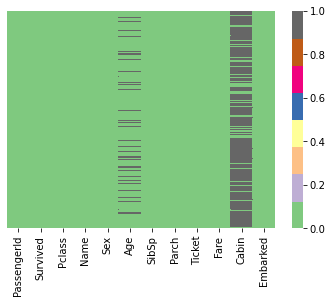

In [5]:
# Scrolling through the entire dataset of 891 rows and checking null values become tough
# Hence , we use visualization library seaborn to use it's property of heatmap to show in a visualised manner that
# which all columns have null values

# yticklabels specifies to mention the column names. xticklabels is for showing record numbers.
# cbar is for whether to show colorbar or not. 
# cmap is for colored visualization
# All null values are displyed in grey color

sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Accent')

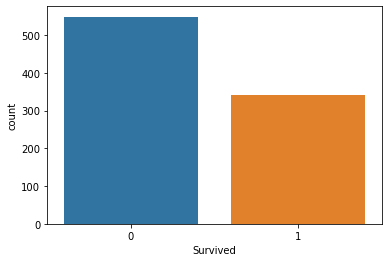

In [6]:
# 'survived' is the dependent variable in this dataset
# Some more visualization 

sns.countplot(x='Survived', data=data)

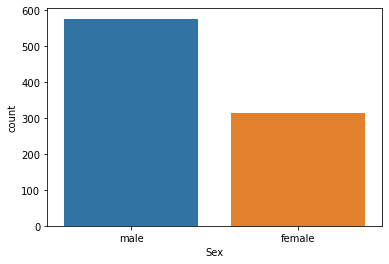

In [7]:
sns.countplot(x='Sex',data=data)

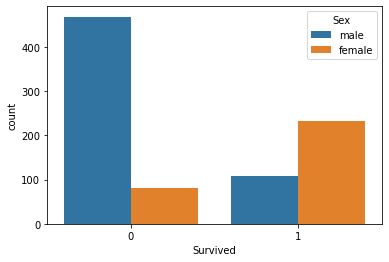

In [8]:
# Now step is to find No. of males and females who survived

sns.countplot(x='Survived', hue='Sex', data=data)

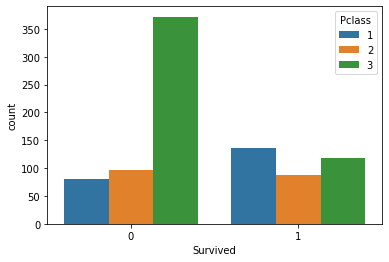

In [9]:
# Here we will find out how many passenger class(Pclass) people survived and how many didnot

sns.countplot(x='Survived',hue='Pclass', data=data)

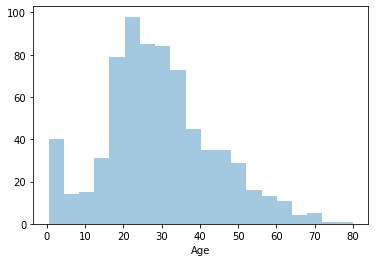

In [10]:
#Checking normal distribution of age group by dropping the NaN values
# kde is Kernel density estimation which gets shown by default
#bins parameter means distribute given dataset in a particular range and show in bars

sns.distplot(data['Age'].dropna(), kde=False)

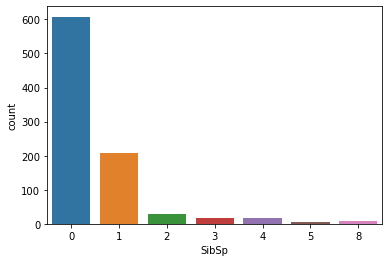

In [11]:
# SibSp is Sibling or spouse
# Determining how many SibSp are present


sns.countplot(x='SibSp', data=data)

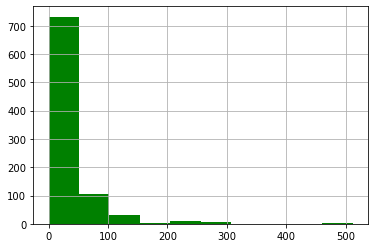

In [12]:
data['Fare'].hist(color='green')

Data Cleaning i.e. Removing the null vaues

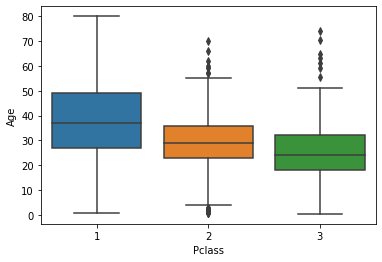

In [13]:
# Column Age and Cabin has null values

#Going to plot a Boxplot to plot a relation of PClass and Age, how much percentile does each passenger class has

sns.boxplot(x='Pclass', y='Age', data=data)


Based upon Pclass and Age , I am going to replace the NaN values Age.

In [14]:
# Writing a function to put values in Age column where there is no value present

def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        
        if(Pclass==1):
            return 37
        
        elif(Pclass==2):
            return 29
        
        else:
            return 24
    
    else:
        return Age     
    


In [15]:
# Applying the above function tot he dataset to replace all Missing values in Age Column

data['Age']=data[['Age','Pclass']].apply(input_age, axis=1)

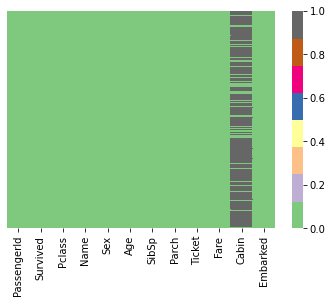

In [16]:
# Checking the heat map again to see if age column has any missing values or not. It shows that it doesnot
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [27]:
#After dropping Cabin column
#data.drop('Cabin',axis=1,inplace=True)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


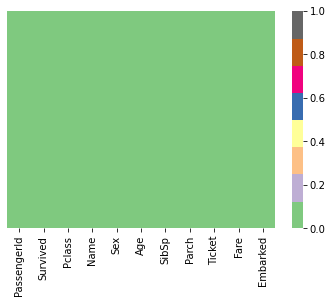

In [28]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Accent')

Handling Categorical Data

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
# Categorical features are Name,Sex, Ticket, Embarked
#using get_dummies () going to convert them

pd.get_dummies(data['Embarked'],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [35]:
data.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [36]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [37]:
# Now the converted categorical feature should be concatenated in the data

data=pd.concat([data,sex,embark],axis=1)

In [38]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Logistic Regression Model

In [39]:
#Splitting the data into trained data and test data

data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [40]:
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
#30% will go to test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

Training and Predicting

In [42]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[132,  22],
       [ 42,  72]])

In [45]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predictions)
accuracy

0.7611940298507462

In [46]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

Evaluating the model

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))